In [ ]:
# File Handling and Manipulation
import os
import shutil
from PIL import Image

# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# GeoSpatial Data Processing
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show

# Utilities
import random
from tqdm import tqdm
import textwrap
import ast
from glob import glob


In [29]:
metadata_df_05percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\0.5%_BigEarthNet\metadata_0.5_percent.csv')
metadata_df_1percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\1%_BigEarthNet\metadata_1_percent.csv')
metadata_df_5percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\metadata_5_percent.csv')
metadata_df_10percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\10%_BigEarthNet\metadata_10_percent.csv')
metadata_df_50percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\50%_BigEarthNet\metadata_50_percent.csv')
metadata_df_original = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv')

dataset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\1%Copy'
original_dataset_dir = r'D:\Datasets\BigEarthNet-S2\100%BigEarthNet'

In [34]:
# Function to clean and parse labels
def clean_and_parse_labels(label_string):
    cleaned_labels = label_string.replace(" '", ", '").replace("[", "[").replace("]", "]")
    return ast.literal_eval(cleaned_labels)

# List of metadata file paths
metadata_files = {
    '0.5%': r'C:\Users\isaac\Desktop\BigEarthTests\0.5%_BigEarthNet\metadata_0.5_percent.csv',
    '1%': r'C:\Users\isaac\Desktop\BigEarthTests\1%_BigEarthNet\metadata_1_percent.csv',
    '5%': r'C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\metadata_5_percent.csv',
    '10%': r'C:\Users\isaac\Desktop\BigEarthTests\10%_BigEarthNet\metadata_10_percent.csv',
    '50%': r'C:\Users\isaac\Desktop\BigEarthTests\50%_BigEarthNet\metadata_50_percent.csv',
    '100%': r'C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv'
}

# Dictionary to store the final DataFrames for each subset
final_dfs = {}

# Process each metadata file
for subset, file_path in metadata_files.items():
    # Read the metadata file
    metadata_df = pd.read_csv(file_path)
    
    # Clean and parse the labels
    metadata_df['labels'] = metadata_df['labels'].apply(clean_and_parse_labels)
    
    # Count the total number of images
    total_images = metadata_df.shape[0]
    
    # Count the number of images for each category
    label_counts = metadata_df['labels'].explode().value_counts().sort_index()
    
    # Convert the label counts to a DataFrame
    label_df = label_counts.reset_index()
    label_df.columns = ['Label', 'Number of Images']
    
    # Add the total images count to the DataFrame
    total_df = pd.DataFrame({'Label': ['Total Images'], 'Number of Images': [total_images]})
    final_df = pd.concat([total_df, label_df], ignore_index=True)
    
    # Sort the DataFrame by 'Number of Images' in ascending order
    final_df = final_df.sort_values(by='Number of Images', ascending=True)
    
    # Store the final DataFrame in the dictionary
    final_dfs[subset] = final_df
    
    # Display the table
    print(f"Subset: {subset}")
    display(final_df)
    print("\n")

Subset: 0.5%


,Label,Number of Images
3,"Beaches, dunes, sands",7
5,Coastal wetlands,7
8,Industrial or commercial units,49
15,Natural grassland and sparsely vegetated areas,52
14,"Moors, heathland and sclerophyllous vegetation",71
10,Inland wetlands,109
17,Permanent crops,145
1,Agro-forestry areas,176
9,Inland waters,291
12,Marine waters,310




Subset: 1%


,Label,Number of Images
3,"Beaches, dunes, sands",6
5,Coastal wetlands,15
15,Natural grassland and sparsely vegetated areas,112
8,Industrial or commercial units,138
14,"Moors, heathland and sclerophyllous vegetation",147
10,Inland wetlands,179
17,Permanent crops,271
1,Agro-forestry areas,336
12,Marine waters,628
19,Urban fabric,644




Subset: 5%


,Label,Number of Images
5,Coastal wetlands,62
3,"Beaches, dunes, sands",65
8,Industrial or commercial units,568
15,Natural grassland and sparsely vegetated areas,585
14,"Moors, heathland and sclerophyllous vegetation",695
10,Inland wetlands,1045
17,Permanent crops,1522
1,Agro-forestry areas,1678
12,Marine waters,3076
9,Inland waters,3090




Subset: 10%


,Label,Number of Images
5,Coastal wetlands,121
3,"Beaches, dunes, sands",140
8,Industrial or commercial units,1089
15,Natural grassland and sparsely vegetated areas,1194
14,"Moors, heathland and sclerophyllous vegetation",1418
10,Inland wetlands,2139
17,Permanent crops,2960
1,Agro-forestry areas,3359
12,Marine waters,6131
9,Inland waters,6227




Subset: 50%


,Label,Number of Images
5,Coastal wetlands,683
3,"Beaches, dunes, sands",689
8,Industrial or commercial units,5531
15,Natural grassland and sparsely vegetated areas,5852
14,"Moors, heathland and sclerophyllous vegetation",7061
10,Inland wetlands,10443
17,Permanent crops,14788
1,Agro-forestry areas,16645
12,Marine waters,30910
19,Urban fabric,31654




Subset: 100%


,Label,Number of Images
3,"Beaches, dunes, sands",1316
5,Coastal wetlands,1397
8,Industrial or commercial units,11142
15,Natural grassland and sparsely vegetated areas,11882
14,"Moors, heathland and sclerophyllous vegetation",13894
10,Inland wetlands,20919
17,Permanent crops,29588
1,Agro-forestry areas,33181
12,Marine waters,61832
9,Inland waters,63212


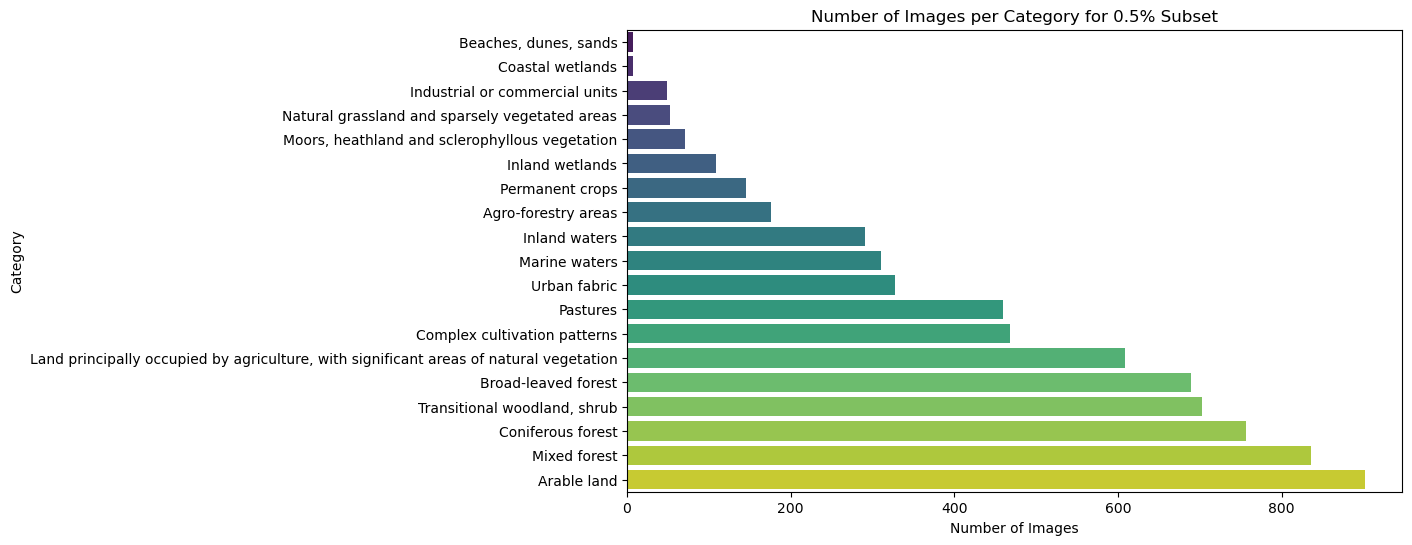

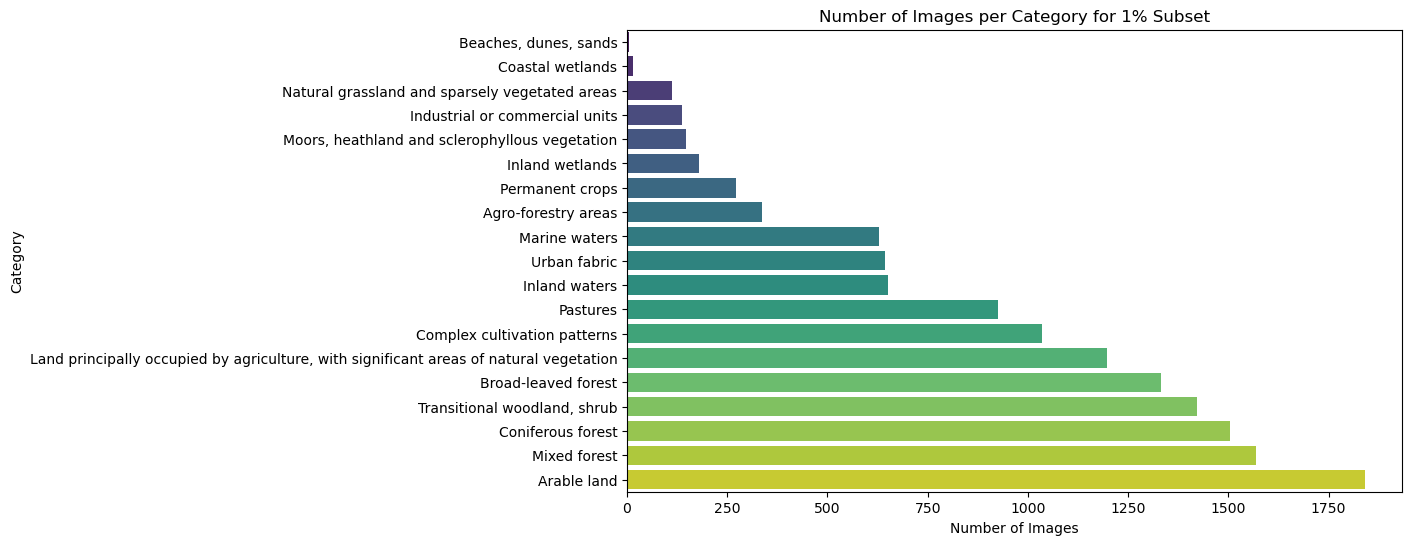

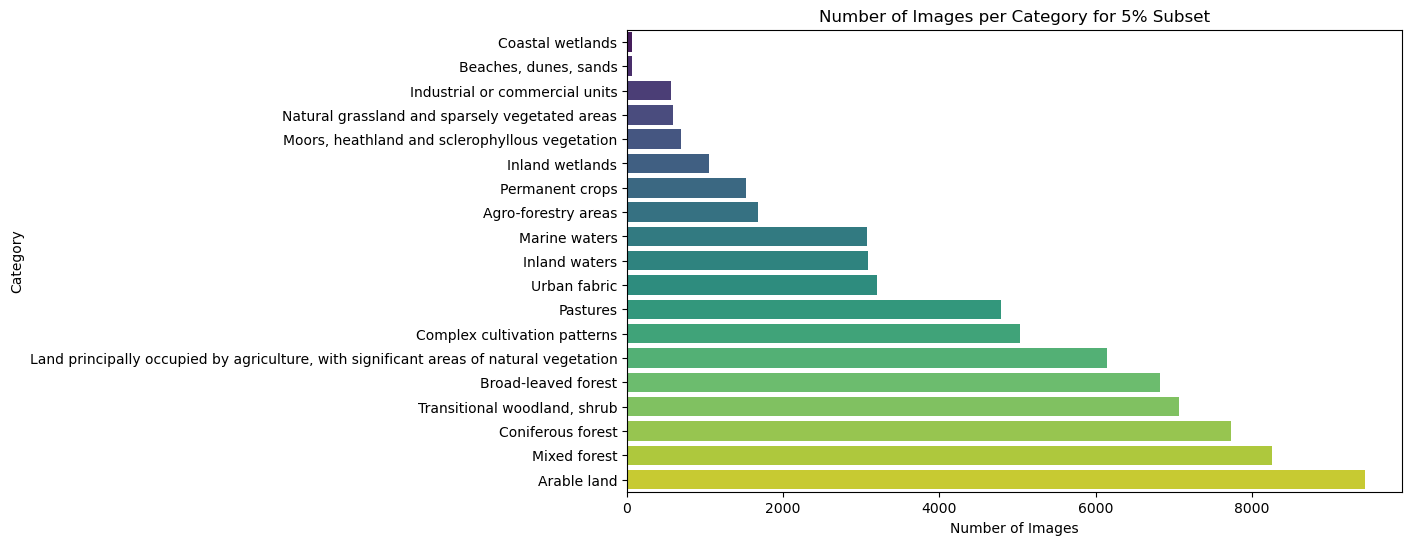

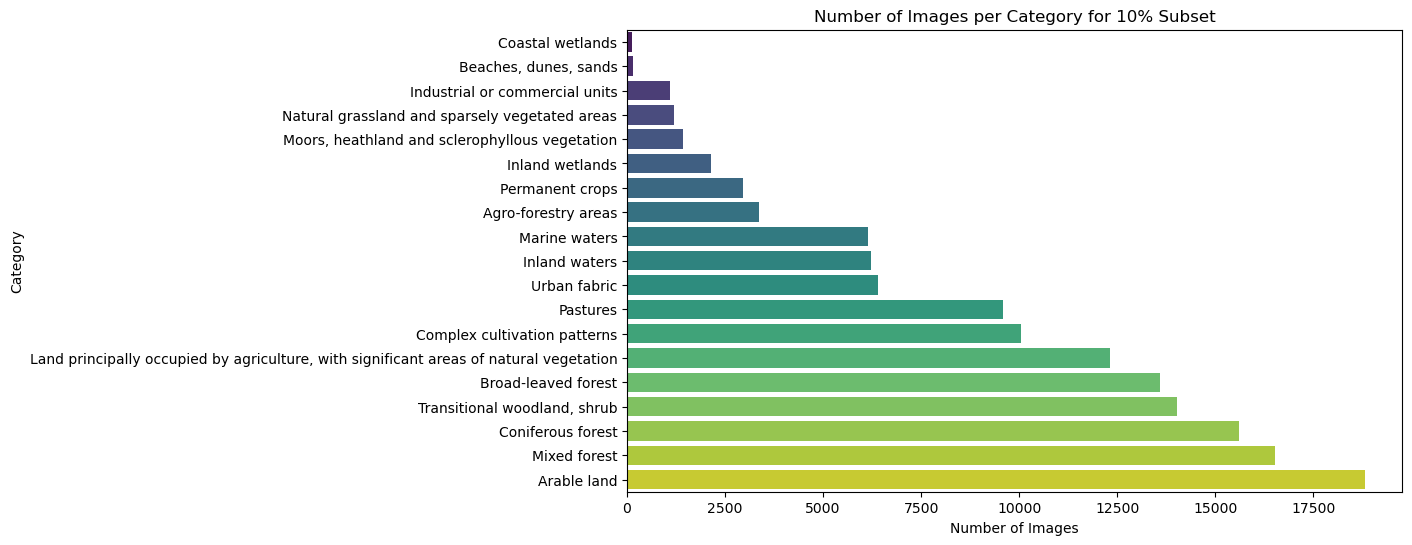

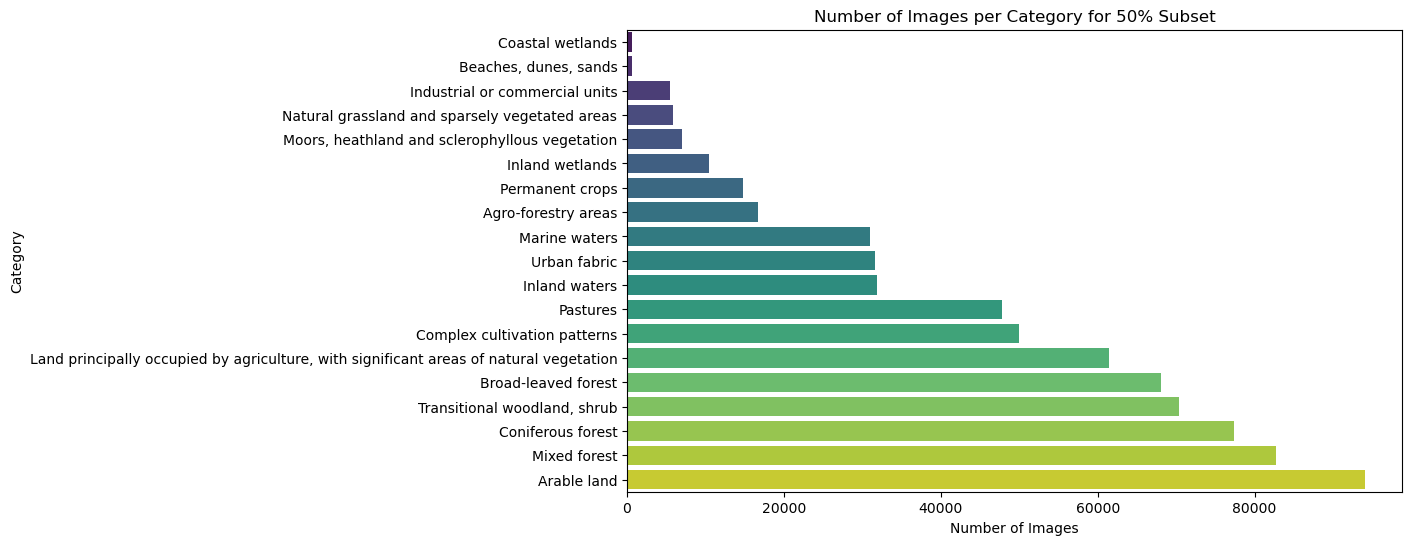

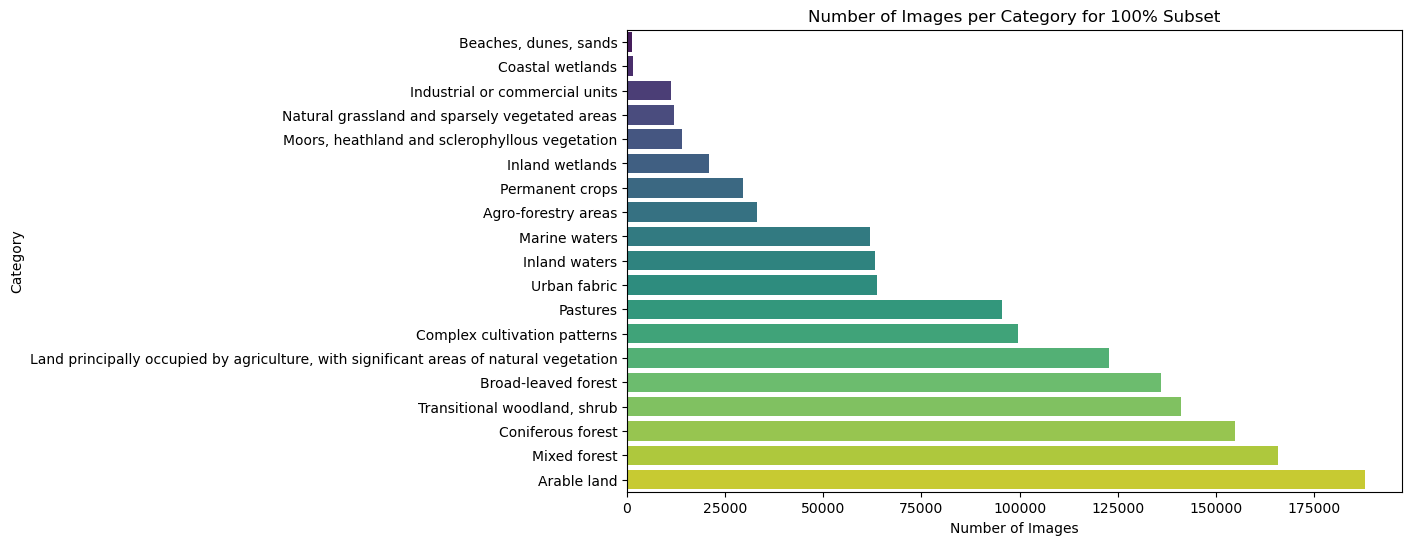

In [37]:
# Plot the data for each subset
for subset, final_df in final_dfs.items():
    # Filter out the "Total Images" row
    plot_df = final_df[final_df['Label'] != 'Total Images']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Number of Images', y='Label', data=plot_df, hue='Label', palette='viridis', dodge=False, legend=False)
    plt.title(f'Number of Images per Category for {subset} Subset')
    plt.xlabel('Number of Images')
    plt.ylabel('Category')
    plt.show()

In [7]:
# Count the number of images in each split
split_counts = metadata_df_1percent['split'].value_counts()

# Create a DataFrame to display the counts
split_counts_df = split_counts.reset_index()
split_counts_df.columns = ['Split', 'Number of Images']

# Display the table
print(split_counts_df)

        Split  Number of Images
0       train              2380
1  validation              1187
2        test              1183


In [8]:
#unique_labels = metadata_df_original['labels'].explode().unique()
exploded_df = metadata_df_original.explode('labels')

unique_labels = metadata_df_original['labels'].explode().unique()
# Check if the labels are strings and need to be converted
if isinstance(metadata_df_original['labels'].iloc[0], str):
    metadata_df_original['labels'] = metadata_df_original['labels'].apply(ast.literal_eval)

# Get unique class labels
class_labels = metadata_df_original['labels'].explode().unique()


exploded_df = metadata_df_original.explode('labels')

label_counts = exploded_df['labels'].value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['Label', 'Number of Images']

# Display the table
display(label_df)

,Label,Number of Images
0,Arable land,188025
1,Mixed forest,165780
2,Coniferous forest,154941
3,"Transitional woodland, shrub",141150
4,Broad-leaved forest,135928
5,"Land principally occupied by agriculture, with...",122709
6,Complex cultivation patterns,99598
7,Pastures,95605
8,Urban fabric,63758
9,Inland waters,63212


In [ ]:
# Print class weights with corresponding class labels in ascending order
class_weights_dict = {label: weight for label, weight in zip(class_labels, DatasetConfig.class_weights)}
sorted_class_weights = sorted(class_weights_dict.items(), key=lambda item: item[1])

print("Class weights with corresponding class labels (ascending order):")
for label, weight in sorted_class_weights:
    print(f"{label}: {weight}")

In [30]:
print(unique_labels)

['Arable land' 'Broad-leaved forest' 'Mixed forest' 'Pastures'
 'Inland waters' 'Coniferous forest' 'Complex cultivation patterns'
 'Land principally occupied by agriculture, with significant areas of natural vegetation'
 'Urban fabric' 'Industrial or commercial units' 'Inland wetlands'
 'Transitional woodland, shrub'
 'Natural grassland and sparsely vegetated areas'
 'Moors, heathland and sclerophyllous vegetation' 'Marine waters'
 'Coastal wetlands' 'Permanent crops' 'Beaches, dunes, sands'
 'Agro-forestry areas']


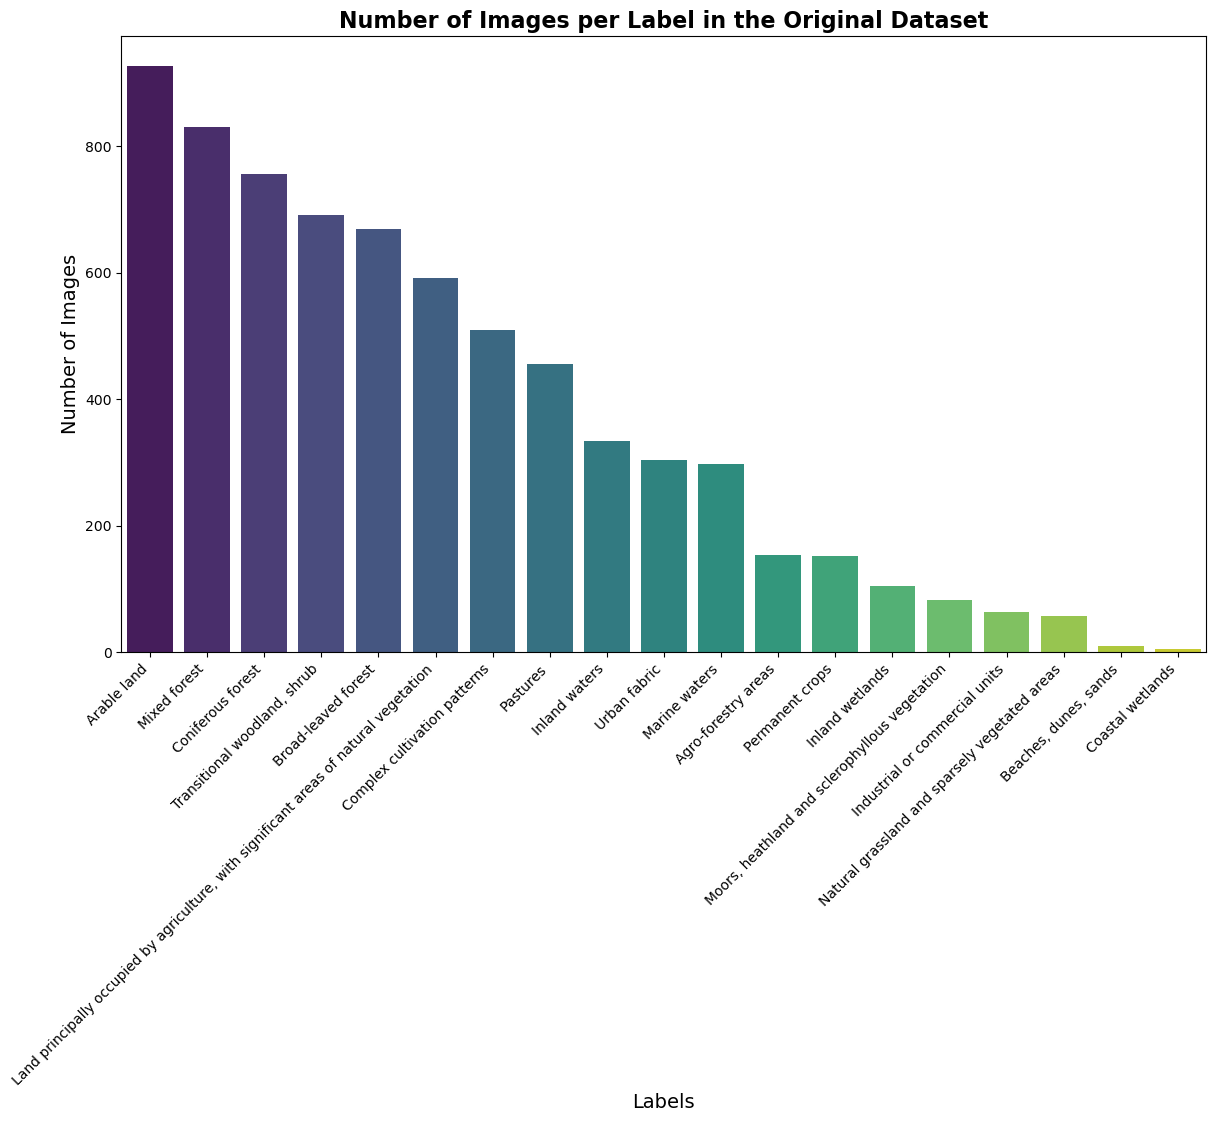

In [32]:
# Function to create a bar plot for the number of images per label
def create_label_bar_plot(metadata_df, title):
    # Explode the labels column
    exploded_df = metadata_df.explode('labels')
    
    # Count the number of images per label
    label_counts = exploded_df['labels'].value_counts()
    label_df = label_counts.reset_index()
    label_df.columns = ['Label', 'Number of Images']
    
    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Label', y='Number of Images', data=label_df, hue='Label', palette='viridis', dodge=False, legend=False)
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel('Labels', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

create_label_bar_plot(metadata_df_50percent, 'Number of Images per Label in the Original Dataset')

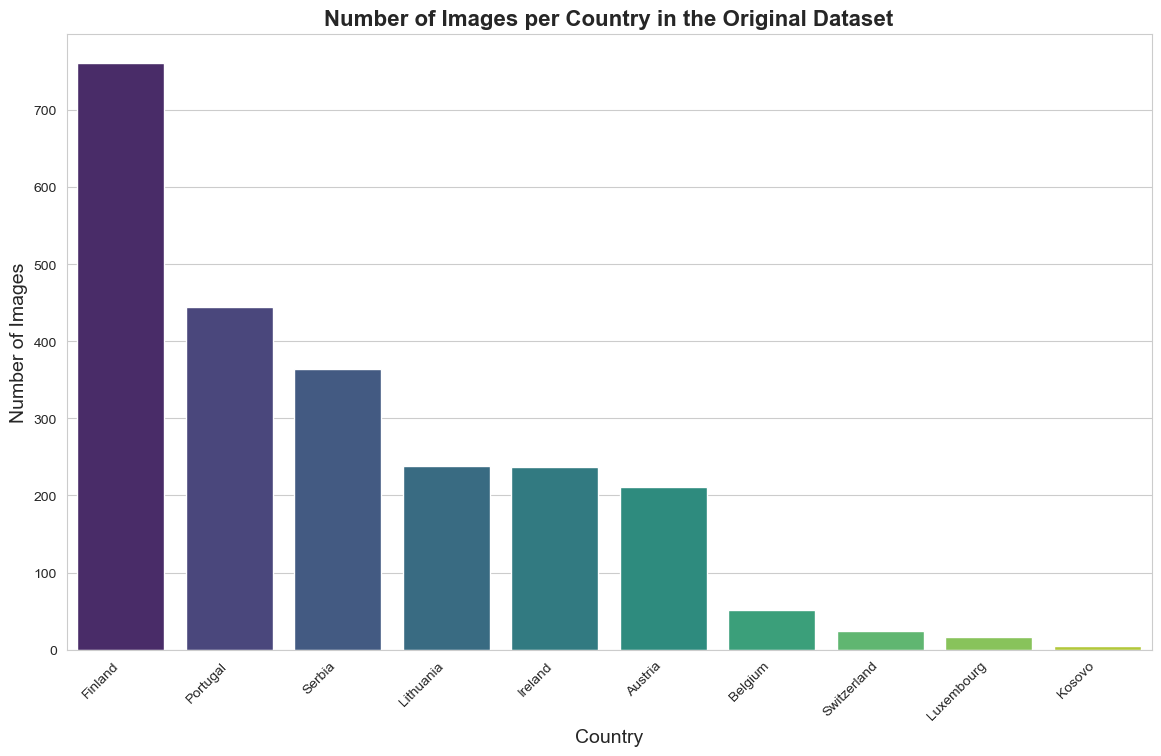

In [33]:
def create_country_bar_plot(metadata_df, title):
    # Count the number of images per country
    country_counts = metadata_df['country'].value_counts()

    # Prepare data for bar graph
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    # Create the bar graph
    plt.figure(figsize=(14, 8))  

    # Plot the bar graph
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_50percent, 'Number of Images per Country in the Original Dataset')

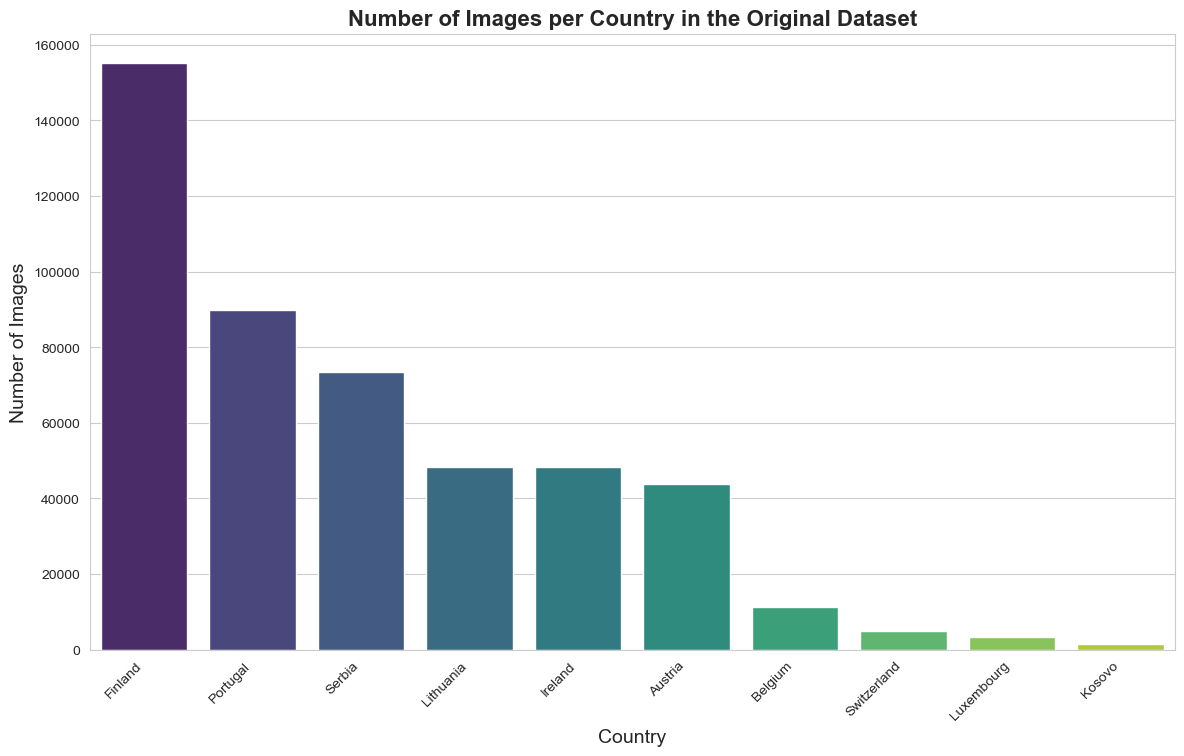

In [ ]:
def create_country_bar_plot(metadata_df, title):
    # Count the number of images per country
    country_counts = metadata_df['country'].value_counts()

    # Prepare data for bar graph
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    # Create the bar graph
    plt.figure(figsize=(14, 8))  

    # Plot the bar graph
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_original, 'Number of Images per Country in the Original Dataset')

Total number of records: 2352


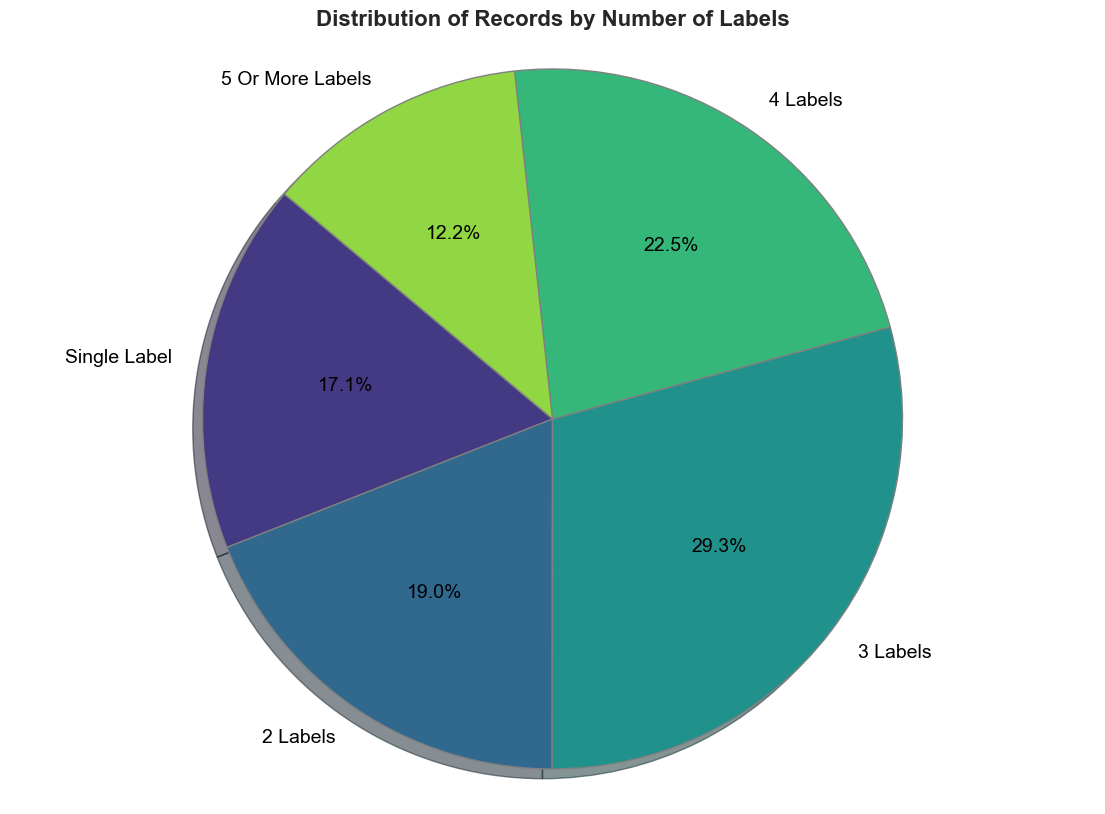

In [34]:
def plot_label_distribution(metadata_df):
    metadata_df['labels'] = metadata_df['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
    # Count the number of labels per record
    metadata_df['label_count'] = metadata_df['labels'].apply(len)

    # Get the counts for each label count
    single_label_count = metadata_df[metadata_df['label_count'] == 1].shape[0]
    two_labels_count = metadata_df[metadata_df['label_count'] == 2].shape[0]
    three_labels_count = metadata_df[metadata_df['label_count'] == 3].shape[0]
    four_labels_count = metadata_df[metadata_df['label_count'] == 4].shape[0]
    five_labels_count = metadata_df[metadata_df['label_count'] >= 5].shape[0]

    # Calculate the total number of records
    total_records = (single_label_count + two_labels_count + three_labels_count +
                     four_labels_count + five_labels_count)
    print(f"Total number of records: {total_records}")
    sns.set_style("whitegrid")

    # Data for the pie chart
    sizes = [single_label_count, two_labels_count, three_labels_count, four_labels_count, five_labels_count]
    labels = ['Single Label', '2 Labels', '3 Labels', '4 Labels', '5 Or More Labels']
    colors = sns.color_palette('viridis', len(sizes))  # Adjust the number of colors as needed

    # Create the pie chart
    plt.figure(figsize=(14, 10))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
            shadow=True, textprops={'fontsize': 14, 'color': 'black'}, wedgeprops={'edgecolor': 'grey'})

    # Title of the pie chart
    plt.title('Distribution of Records by Number of Labels', fontsize=16, weight='bold')

    # Display the pie chart
    plt.axis('equal')  
    plt.show()

plot_label_distribution(metadata_df_50percent)

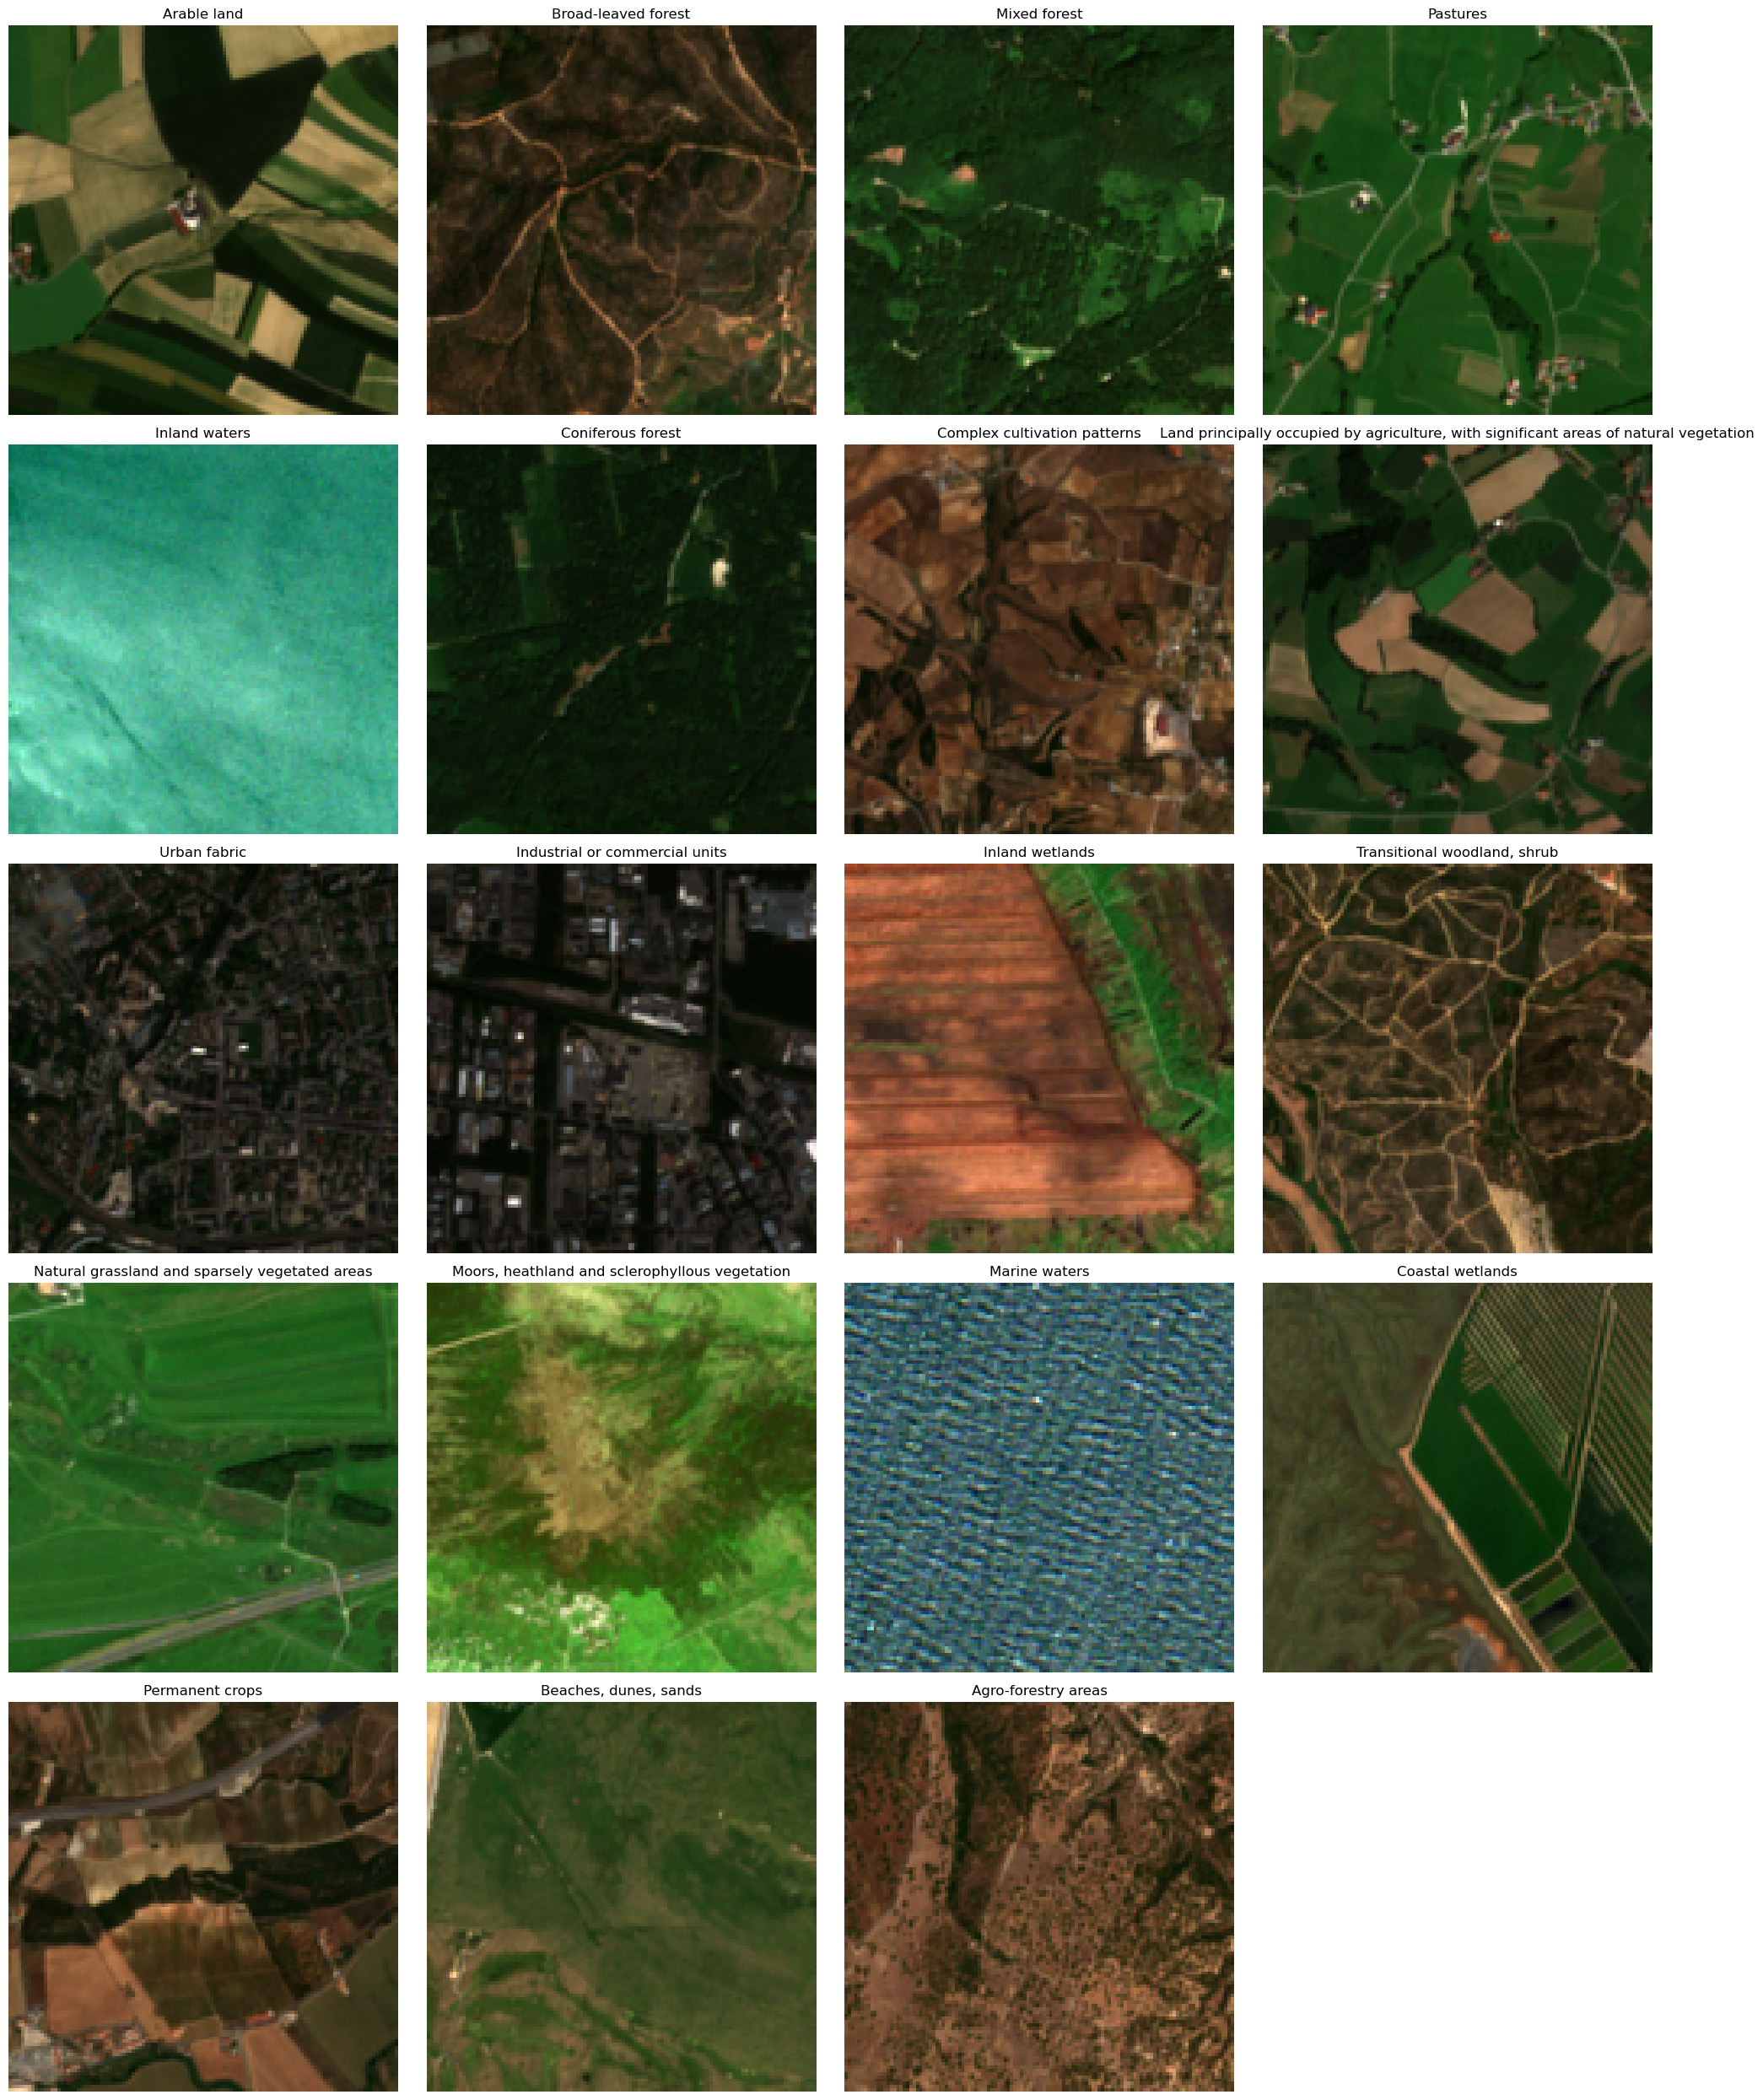

In [28]:
# Convert numpy.ndarray to list if necessary
metadata_df_original['labels'] = metadata_df_original['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

# Filter the DataFrame to get rows with exactly one label
single_label_df = metadata_df_original[metadata_df_original['labels'].apply(len) == 1]

# Dictionary to store the first patch_id for each label
first_patch_ids = {}

# Iterate through each unique label and find the first patch_id with that label
for label in unique_labels:
    filtered_df = single_label_df[single_label_df['labels'].apply(lambda x: x[0] == label)]
    if not filtered_df.empty:
        first_patch_id = filtered_df.iloc[0]['patch_id']
        first_patch_ids[label] = first_patch_id

# Function to read and stack 3 bands
def read_bands(patch_id, bands=['B04', 'B03', 'B02']):
    base_patch_id = '_'.join(patch_id.split('_')[:-2])
    band_paths = [os.path.join(original_dataset_dir, base_patch_id, patch_id, f"{patch_id}_{band}.tif") for band in bands]
    stacked_bands = []
    for band_path in band_paths:
        with rasterio.open(band_path) as src:
            band = src.read(1)
            stacked_bands.append(band)
    image = np.stack(stacked_bands, axis=-1)
    # Normalize the image to the range [0, 1]
    image = (image - image.min()) / (image.max() - image.min())
    return image

# Plotting the images in a grid
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for i, (label, patch_id) in enumerate(first_patch_ids.items()):
    image = read_bands(patch_id)
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

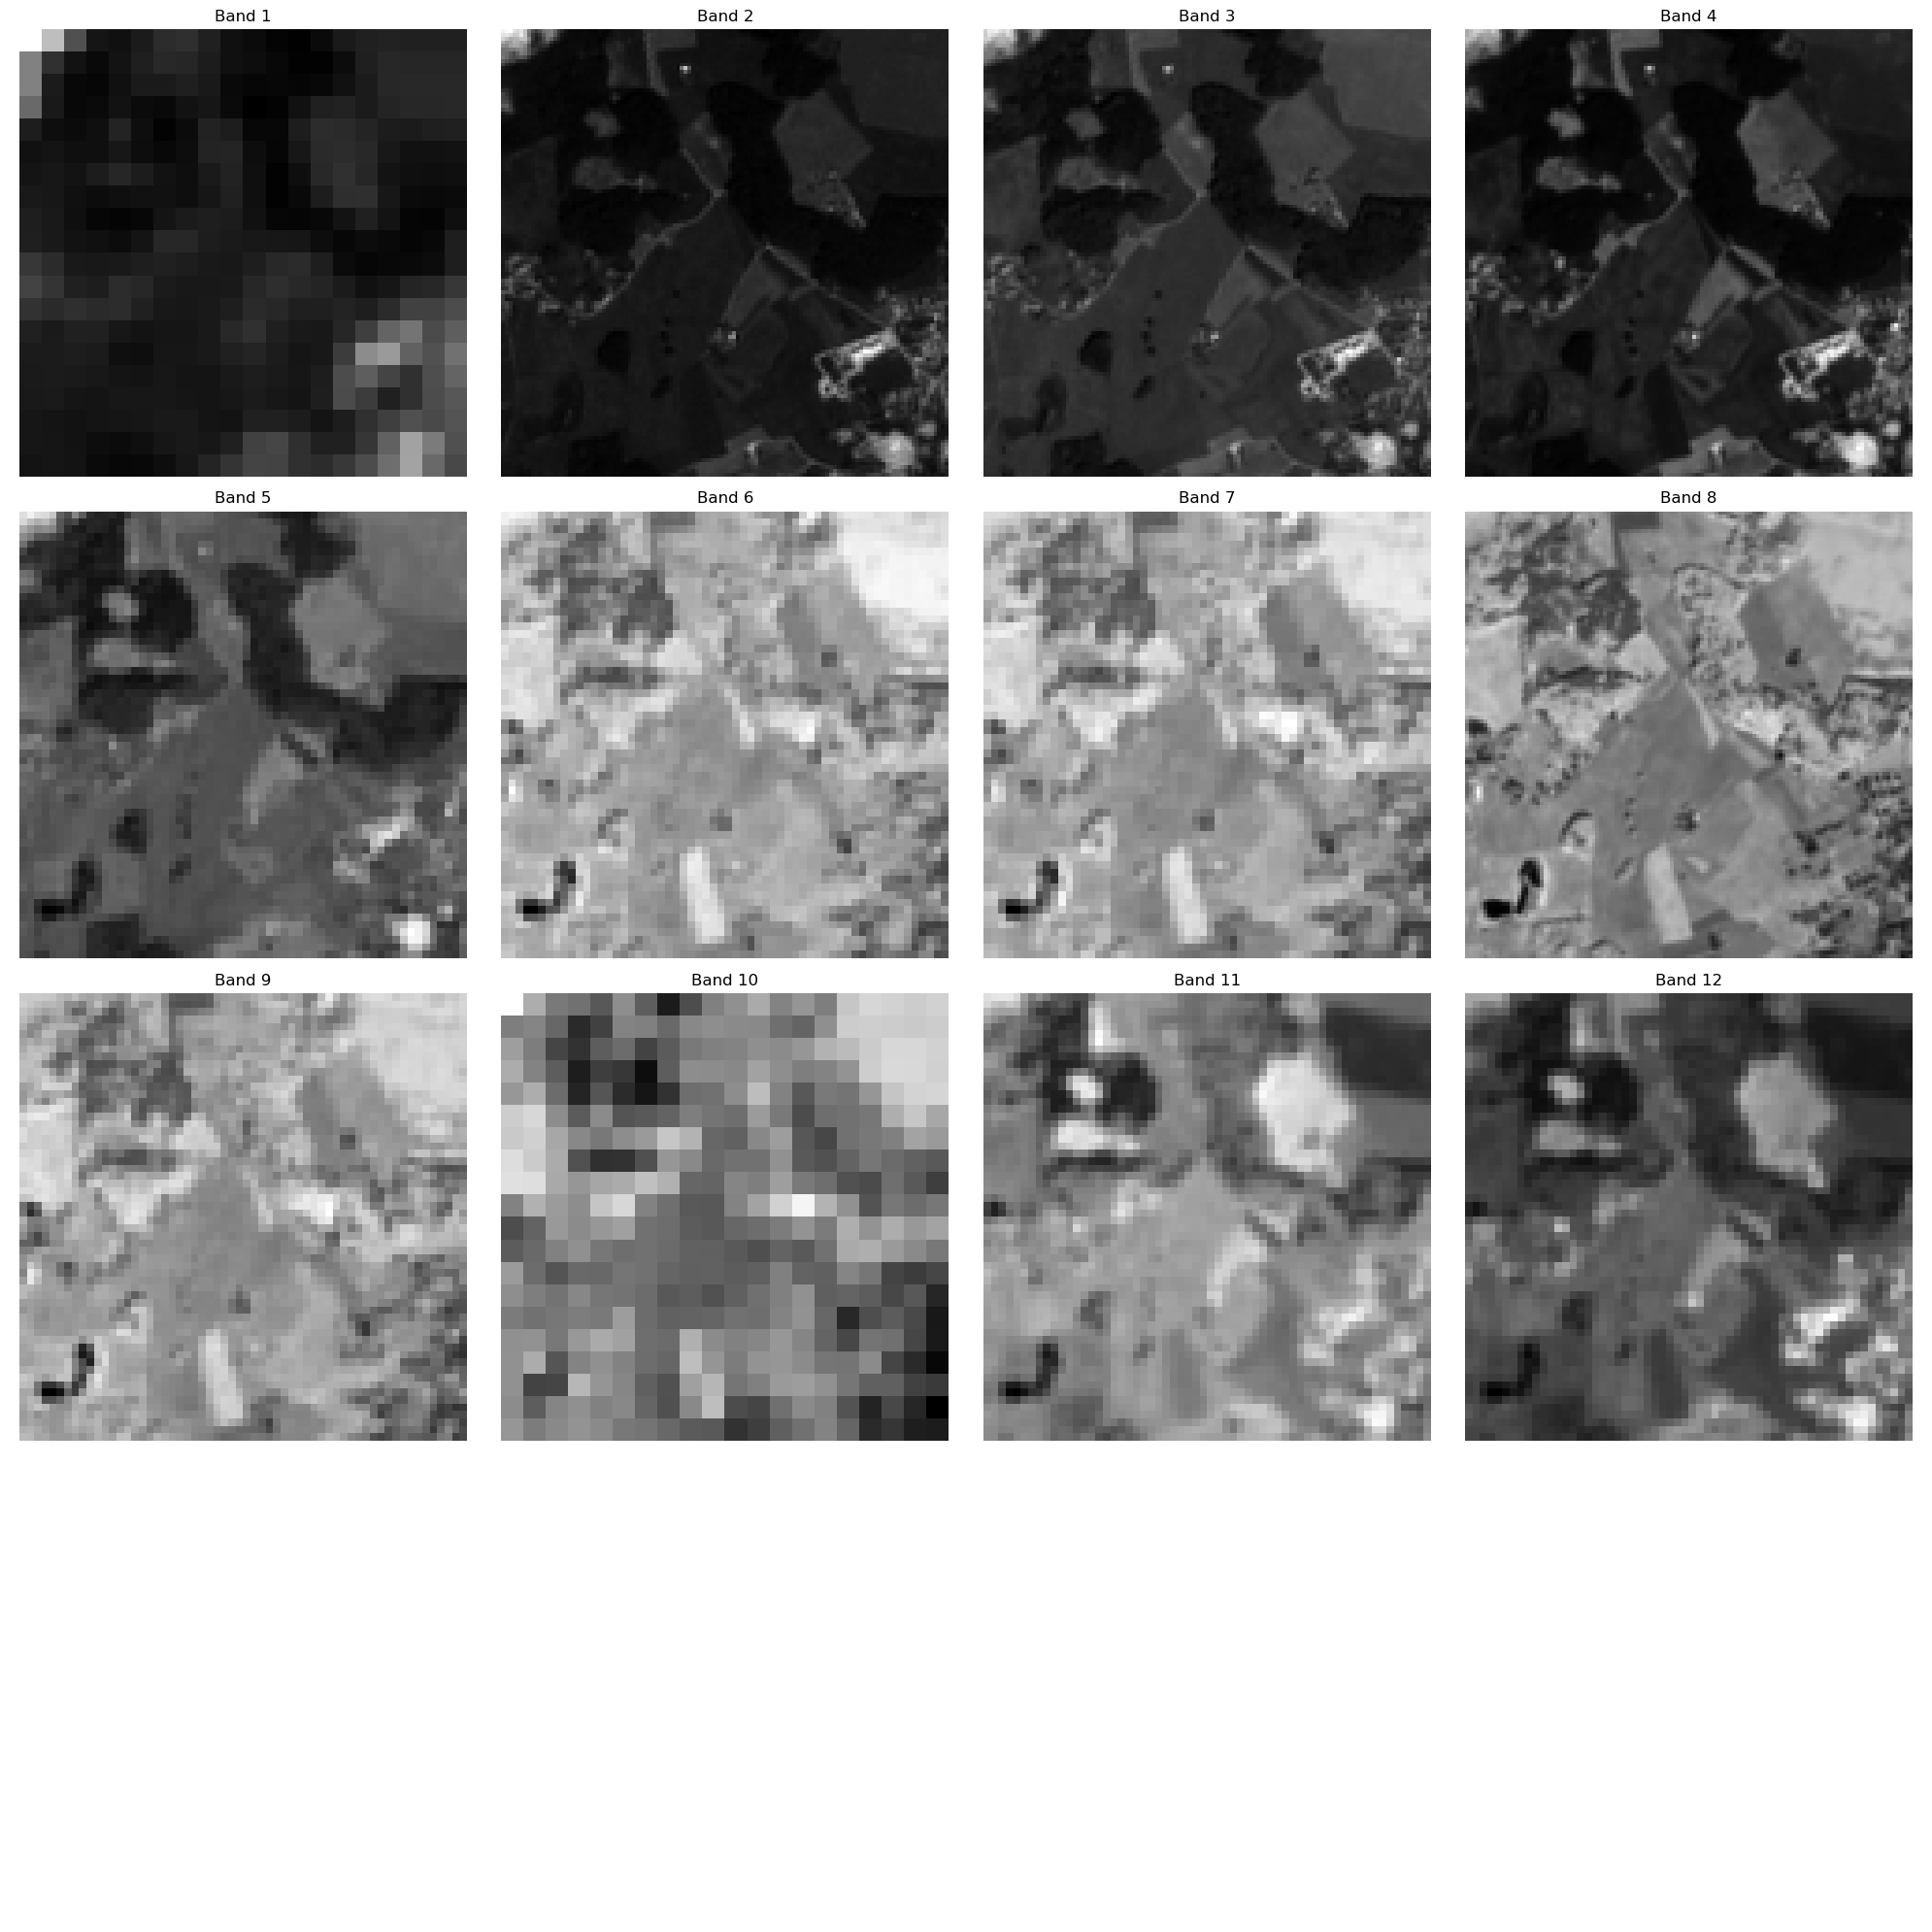

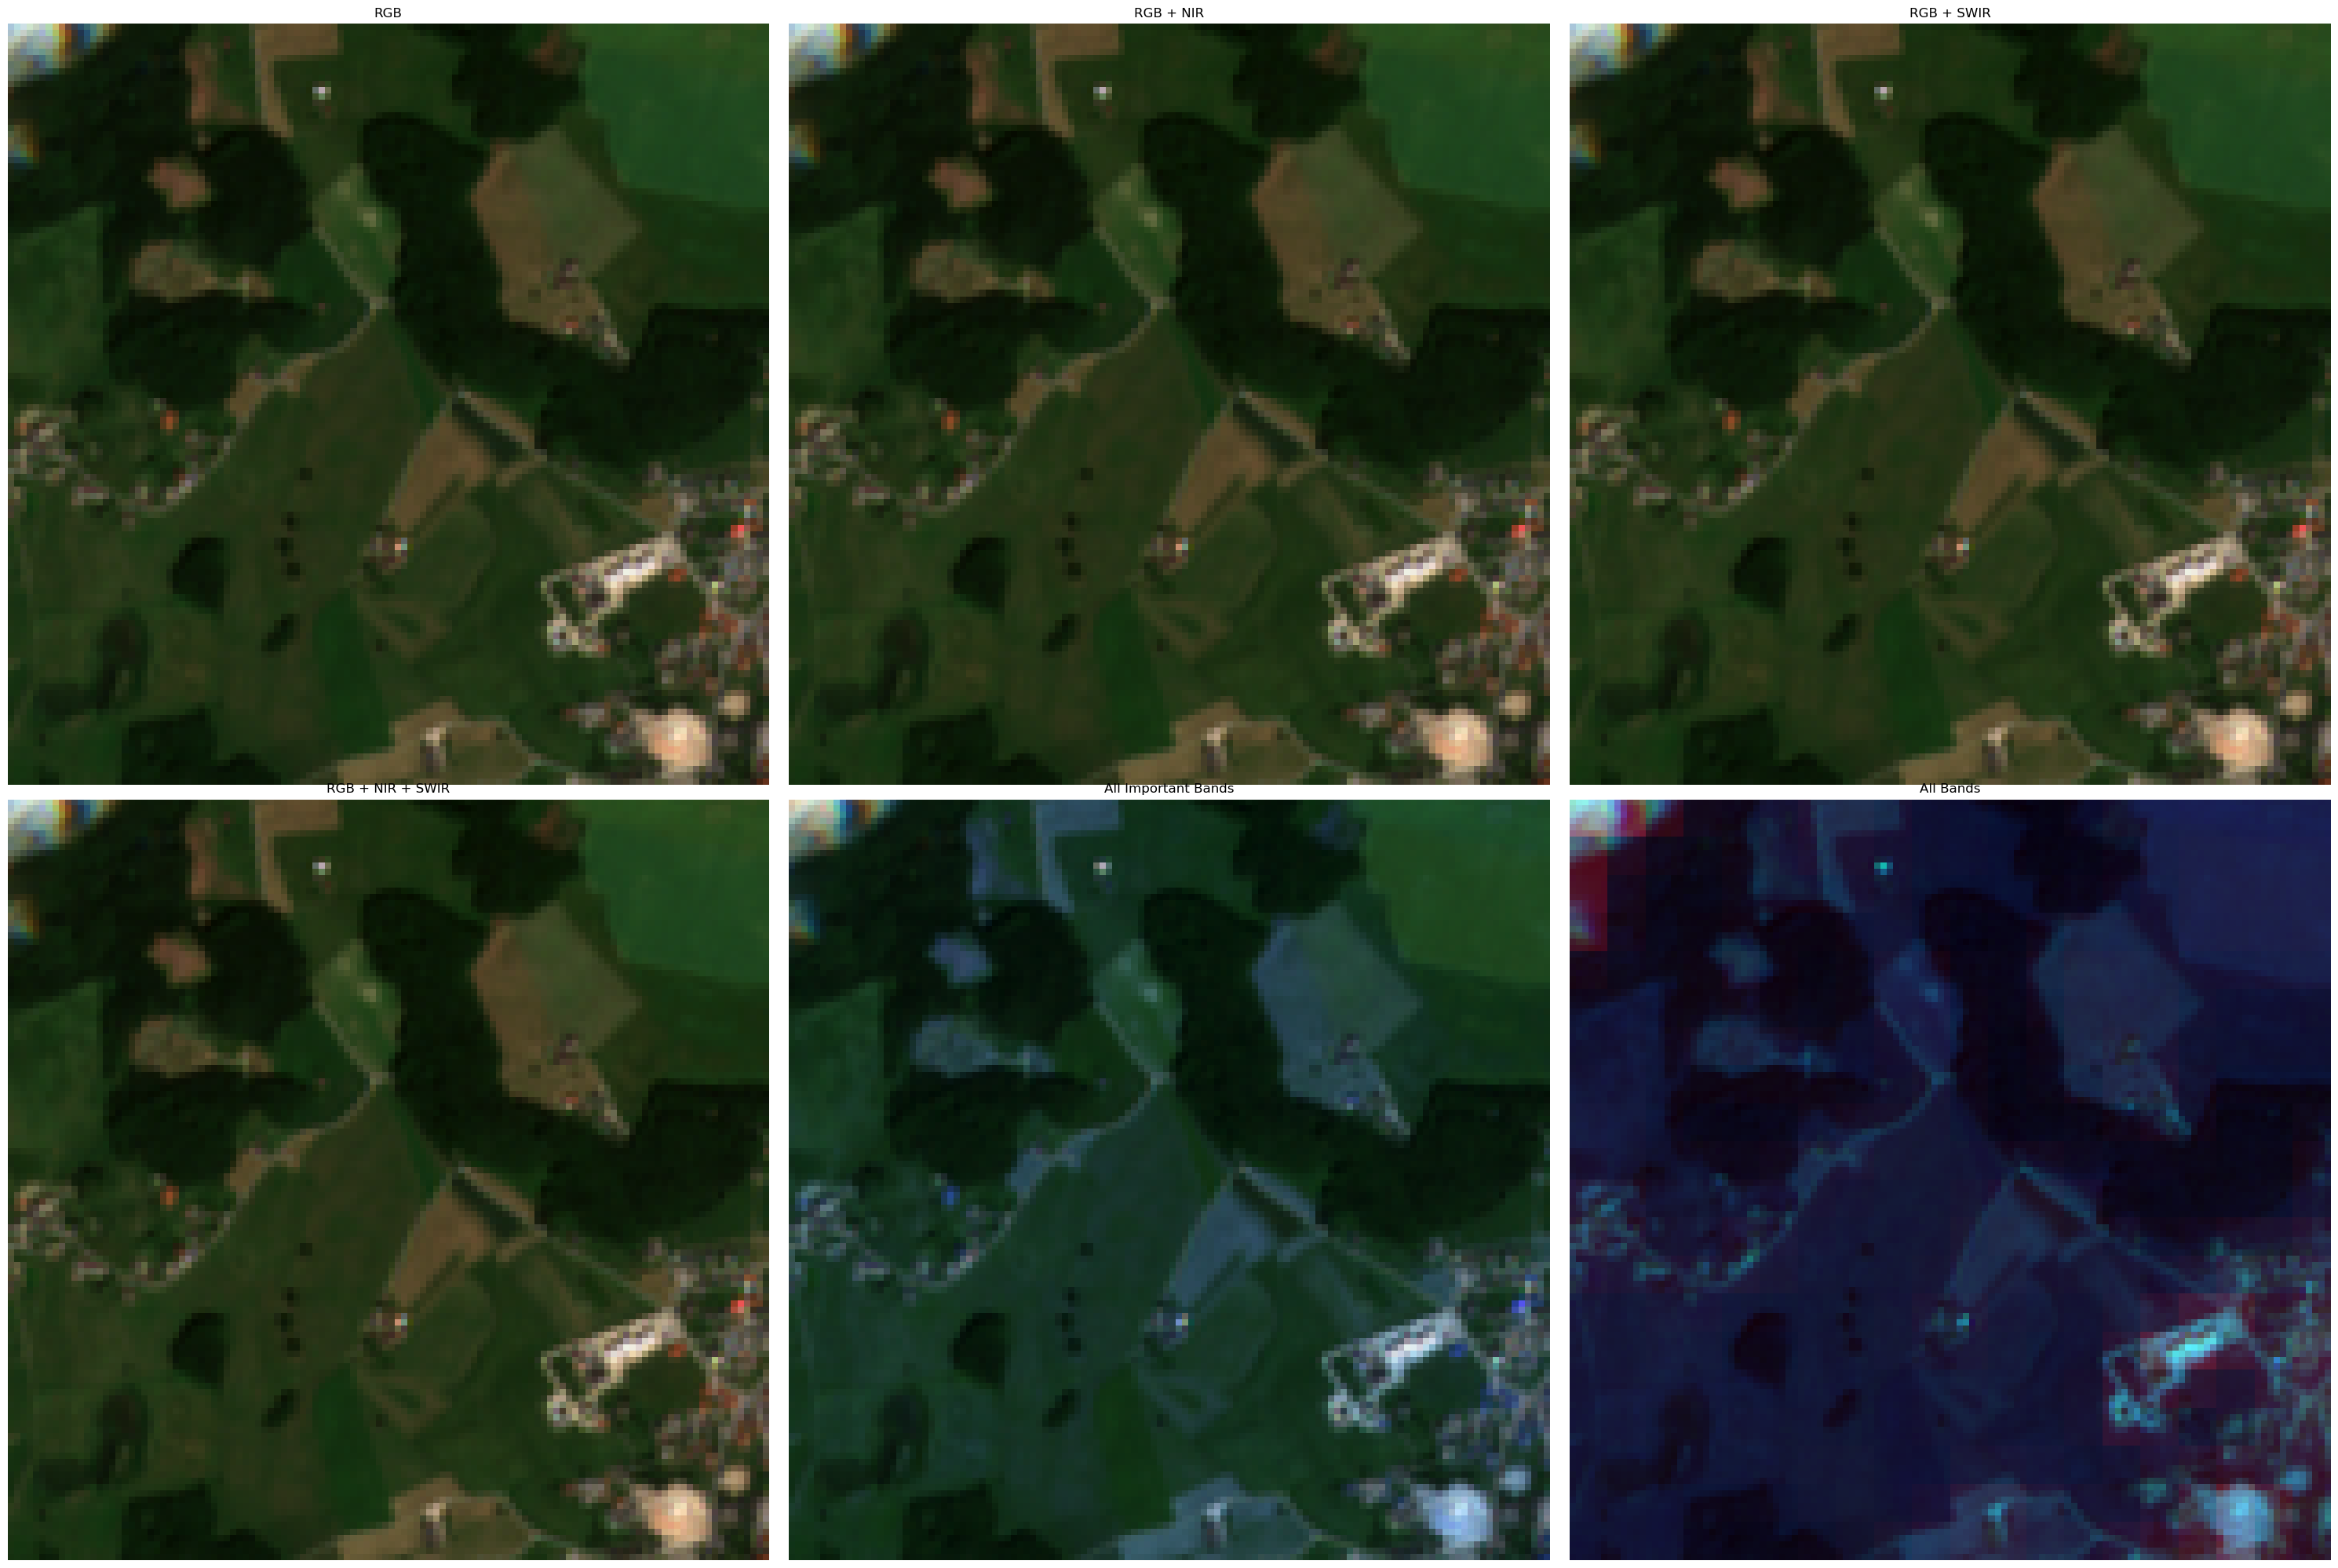

In [43]:
# Path to the combined 13-band TIFF file
tif_path = r'C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\CombinedImages\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_41_60.tif'

# Read the combined 13-band TIFF file
with rasterio.open(tif_path) as src:
    combined_image = src.read()

# Number of bands
num_bands = combined_image.shape[0]

# Plot the individual bands
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i in range(num_bands):
    axes[i].imshow(combined_image[i], cmap='gray')
    axes[i].set_title(f'Band {i+1}')
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(num_bands, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Function to extract and normalize bands
def extract_and_normalize_bands(image, band_indices):
    extracted_image = np.stack([image[i] for i in band_indices], axis=-1)
    normalized_image = (extracted_image - extracted_image.min()) / (extracted_image.max() - extracted_image.min())
    return normalized_image

# Band combinations
band_combinations = {
    'RGB': [3, 2, 1],  # Bands 4, 3, 2
    'RGB + NIR': [3, 2, 1, 7],  # Bands 4, 3, 2, 8
    'RGB + SWIR': [3, 2, 1, 10, 11],  # Bands 4, 3, 2, 11, 12
    'RGB + NIR + SWIR': [3, 2, 1, 7, 10, 11],  # Bands 4, 3, 2, 8, 11, 12
    'All Important Bands': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Bands 2, 3, 4, 5, 6, 7, 8, 8A, 11, 12
    'All Bands': list(range(13))  # Bands 1 to 13
}

# Plot the band combinations
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for i, (title, band_indices) in enumerate(band_combinations.items()):
    if len(band_indices) == 3:
        image = extract_and_normalize_bands(combined_image, band_indices)
        axes[i].imshow(image)
    else:
        # For combinations with more than 3 bands, plot the first 3 bands as RGB
        image = extract_and_normalize_bands(combined_image, band_indices[:3])
        axes[i].imshow(image)
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()